<a href="https://colab.research.google.com/github/swapnil-mergal/Capstone-Project-2-Ted-Talk-review-Prediction/blob/main/Capstone_Project_2_Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [170]:
data = pd.read_csv("/content/data_ted_talks.csv")

In [171]:
#top five rows of data
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [172]:
# bottom five rows
data.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [173]:
#shape of the data
data.shape

(4005, 19)

In [174]:
data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [175]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [176]:
#checking details of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [155]:
#print the unique value
data.nunique()

,0
talk_id,4005
title,4005
speaker_1,3274
all_speakers,3306
occupations,2049
about_speakers,2977
views,3996
recorded_date,1334
published_date,2962
event,459


In [156]:
#looking at null values
data.isnull().sum()

,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0


In [157]:
#checking datatype
data.dtypes

,0
talk_id,int64
title,object
speaker_1,object
all_speakers,object
occupations,object
about_speakers,object
views,int64
recorded_date,object
published_date,object
event,object


In [158]:
# checking astype
data.astype

<bound method NDFrame.astype of       talk_id                                             title  \
0           1                       Averting the climate crisis   
1          92                   The best stats you've ever seen   
2           7                                  Simplicity sells   
3          53                               Greening the ghetto   
4          66                       Do schools kill creativity?   
...       ...                                               ...   
4000    62678       Crisis support for the world, one text away   
4001    62782                      The dark history of IQ tests   
4002    62263  How "policing for profit" undermines your rights   
4003    62784      The electrifying speeches of Sojourner Truth   
4004    62794              The most important anus in the ocean   

                 speaker_1                 all_speakers  \
0                  Al Gore               {0: 'Al Gore'}   
1             Hans Rosling          {0: 'Hans Rosling'}   
2              David Pogue           {0: 'David Pogue'}   
3            Majora Carter         {0: 'Majora Carter'}   
4         Sir Ken Robinson      {0: 'Sir Ken Robinson'}   
...                    ...                          ...   
4000          Nancy Lublin          {0: 'Nancy Lublin'}   
4001   Stefan C Dombrowski   {0: 'Stefan C Dombrowski'}   
4002  Dick M. Carpenter II  {0: 'Dick M. Carpenter II'}   
4003     Daina Ramey Berry     {0: 'Daina Ramey Berry'}   
4004          Cella Wright          {0: 'Cella Wright'}   

                                        occupations  \
0                         {0: ['climate advocate']}   
1     {0: ['global health expert; data visionary']}   
2                     {0: ['technology columnist']}   
3       {0: ['activist for environmental justice']}   
4                       {0: ['author', 'educator']}   
...                                             ...   
4000                       {0: ['health activist']}   
4001                                            NaN   
4002                        {0: ['law researcher']}   
4003                                            NaN   
4004                                            NaN   

                                         about_speakers     views  \
0     {0: 'Nobel Laureate Al Gore focused the world’...   3523392   
1     {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685   
2     {0: 'David Pogue is the personal technology co...   1920832   
3     {0: 'Majora Carter redefined the field of envi...   2664069   
4     {0: "Creativity expert Sir Ken Robinson challe...  65051954   
...                                                 ...       ...   
4000  {0: 'Nancy Lublin, cofounder and CEO of Crisis...    502934   
4001                                                NaN    307187   
4002  {0: 'Dick M. Carpenter II studies cutting edge...    464414   
4003                                                NaN     56582   
4004                                                NaN         0   

     recorded_date published_date                 event native_lang  \
0       2006-02-25     2006-06-27               TED2006          en   
1       2006-02-22     2006-06-27               TED2006          en   
2       2006-02-24     2006-06-27               TED2006          en   
3       2006-02-26     2006-06-27               TED2006          en   
4       2006-02-25     2006-06-27               TED2006          en   
...            ...            ...                   ...         ...   
4000    2020-04-22     2020-04-27  TED2020: The Prequel          en   
4001    2020-04-27     2020-04-27                TED-Ed          en   
4002    2019-06-22     2020-04-28          TEDxMileHigh          en   
4003    2020-04-28     2020-04-30                TED-Ed          en   
4004    2020-04-30     2020-04-30                TED-Ed          en   

                                         available_lang  comments  duration  \
0     ['ar', 'bg', 'cs', 'de', '

# EDA

In [159]:
# Step 2: Exploratory Data Analysis (EDA)
data.isnull().sum()


,0
talk_id,0
title,0
speaker_1,0
all_speakers,4
occupations,522
about_speakers,503
views,0
recorded_date,1
published_date,0
event,0


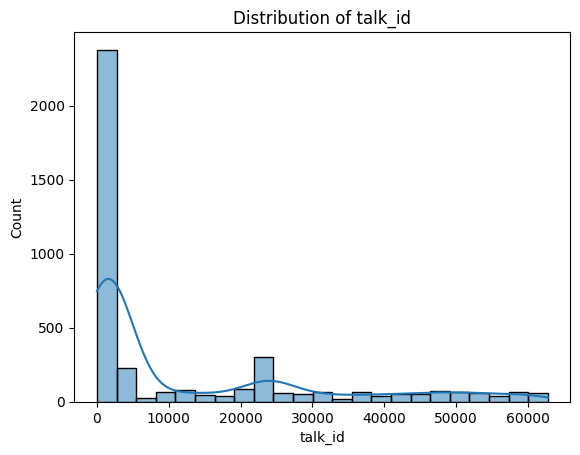

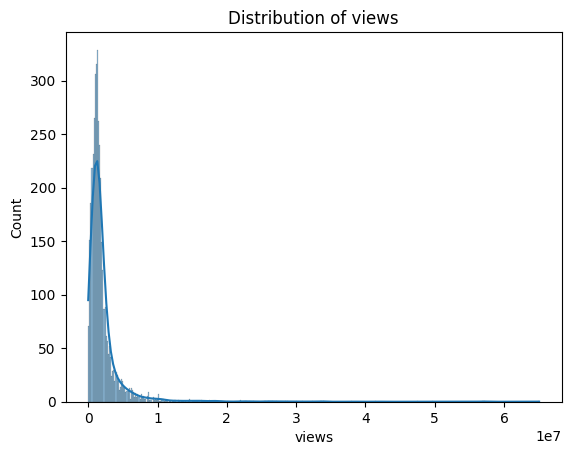

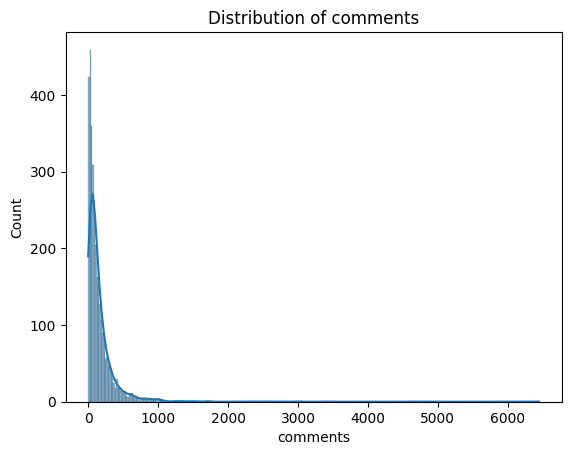

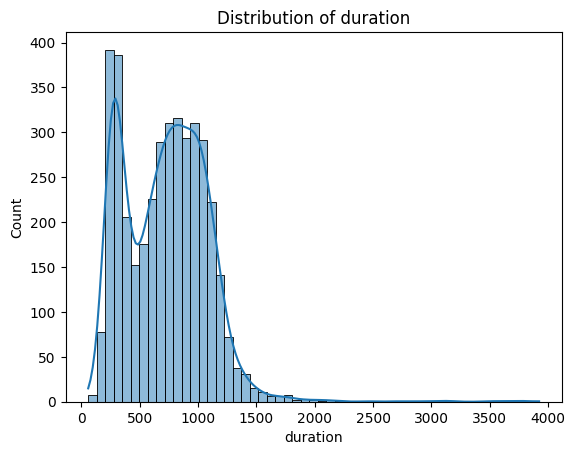

In [160]:
# Visualizing distributions of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


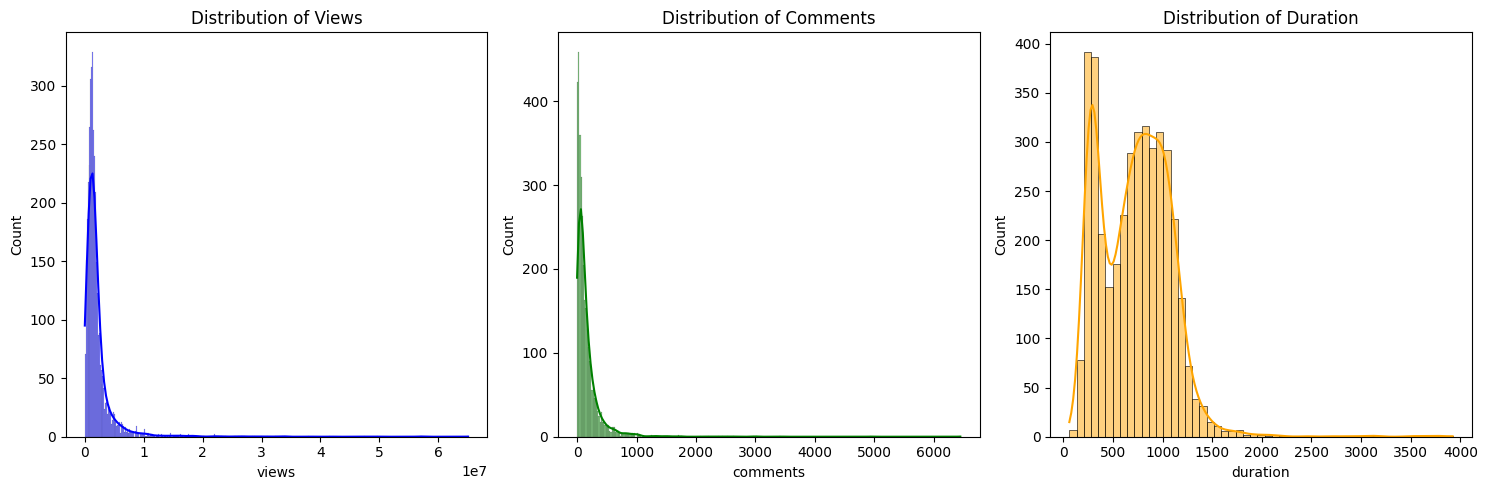

In [161]:
# Plot distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['views'], kde=True, color='blue')
plt.title('Distribution of Views')

plt.subplot(1, 3, 2)
sns.histplot(data['comments'], kde=True, color='green')
plt.title('Distribution of Comments')

plt.subplot(1, 3, 3)
sns.histplot(data['duration'], kde=True, color='orange')
plt.title('Distribution of Duration')

plt.tight_layout()
plt.show()

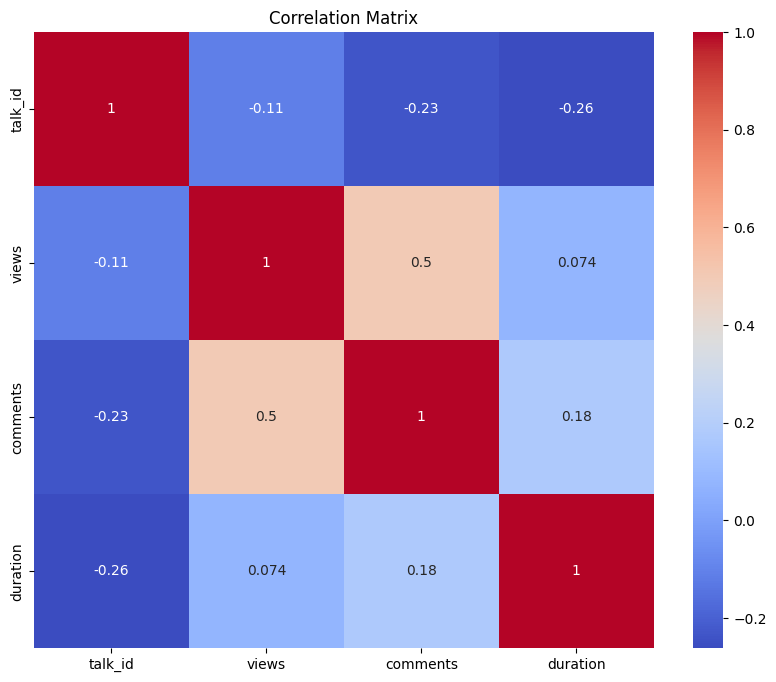

In [162]:
# Correlation heatmap (only for numerical columns)
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numerical_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Data Preprocessing

In [177]:
# Step 3: Checking for Missing Values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Fill missing values for numeric columns with their mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for non-numeric columns with their mode
non_numeric_columns = data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing values after handling:")
print(data.isnull().sum())



Checking for missing values:
talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

Missing values after handling:
talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


In [178]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [179]:
# Step 4: Feature Engineering
# Convert 'recorded_date' and 'published_date' to datetime
data['recorded_date'] = pd.to_datetime(data['recorded_date'], errors='coerce')
data['published_date'] = pd.to_datetime(data['published_date'], errors='coerce')

# Extracting year, month, and day from date columns
data['recorded_date_year'] = data['recorded_date'].dt.year
data['recorded_date_month'] = data['recorded_date'].dt.month
data['recorded_date_day'] = data['recorded_date'].dt.day

data['published_date_year'] = data['published_date'].dt.year
data['published_date_month'] = data['published_date'].dt.month
data['published_date_day'] = data['published_date'].dt.day


In [180]:
# Drop original date columns
data.drop(['recorded_date', 'published_date'], axis=1, inplace=True)


In [181]:
# Step 5: Encoding Categorical Variables
# Use one-hot encoding for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nDataset after feature engineering and encoding:")
print(data.head())


Dataset after feature engineering and encoding:
   talk_id     views  comments  duration  recorded_date_year  \
0        1   3523392     272.0       977                2006   
1       92  14501685     628.0      1190                2006   
2        7   1920832     124.0      1286                2006   
3       53   2664069     219.0      1116                2006   
4       66  65051954    4931.0      1164                2006   

   recorded_date_month  recorded_date_day  published_date_year  \
0                    2                 25                 2006   
1                    2                 22                 2006   
2                    2                 24                 2006   
3                    2                 26                 2006   
4                    2                 25                 2006   

   published_date_month  published_date_day  ...  \
0                     6                  27  ...   
1                     6                  27  ...   
2            

In [182]:
# Step 6: Define Target and Features
# Assuming 'views' is the target column
if 'views' in data.columns:
    target = 'views'
else:
    raise ValueError("The dataset must have a 'views' column as the target variable.")

X = data.drop(columns=[target])
y = data[target]


In [183]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [184]:
# Step 8: Standardize Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing Completed!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Data Preprocessing Completed!
Training set shape: (3204, 39977)
Test set shape: (801, 39977)


# # Step 9: Machine Learning Models

In [185]:
# Step 9: Machine Learning Models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [186]:
# Training and evaluating models
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


Random Forest:
Mean Squared Error: 7961424952153.248
R^2 Score: 0.13687229615776797

Decision Tree:
Mean Squared Error: 11082708833775.148
R^2 Score: -0.20151770387048606

XGBoost:
Mean Squared Error: 7474268078080.0
R^2 Score: 0.1896868348121643


In [197]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

#
# Step 10: Hyperparameter Tuning for Random Forest (Quick Tuning)

In [198]:
from sklearn.model_selection import RandomizedSearchCV

# Step 10: Hyperparameter Tuning for Random Forest (Quick Tuning)
quick_param_grid = {
    'n_estimators': [10],  # Reduced number of trees
    'max_depth': [5],  # Fewer depth levels
    'min_samples_split': [2]  # Fewer split options
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    quick_param_grid,
    n_iter=2,  # Test only 5 random combinations
    cv=2,  # Use fewer cross-validation splits
    scoring='r2',
    random_state=42

)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and evaluation
print("\nBest Parameters for Random Forest (Quick Tuning):")
print(random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest with Best Parameters:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")



Best Parameters for Random Forest (Quick Tuning):
{'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 5}

Random Forest with Best Parameters:
Mean Squared Error: 9047836433428.092
R^2 Score: 0.0190903848923758


# # Step 11: Feature Importance (Random Forest)

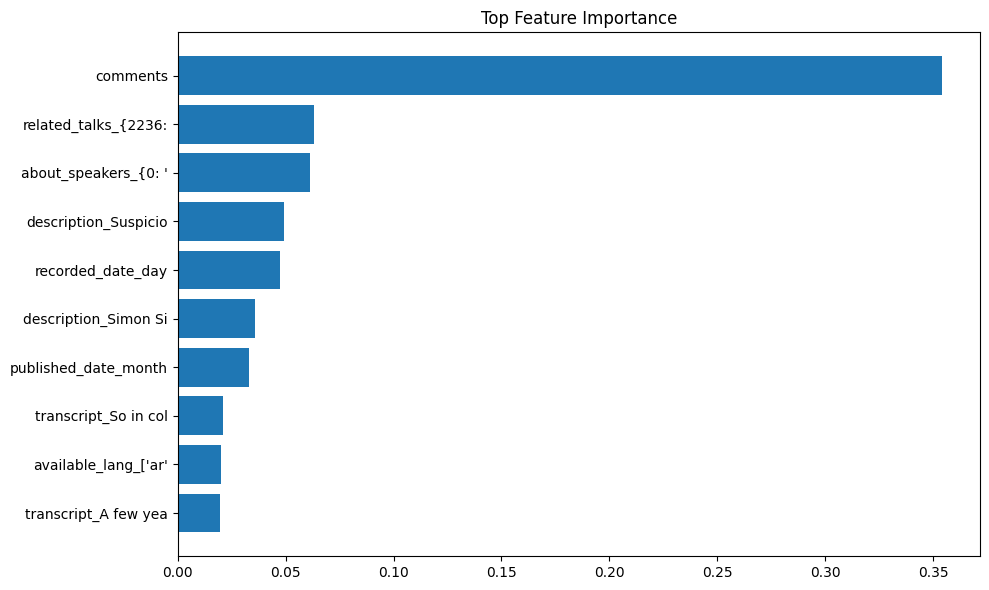

In [207]:
# Select top N features
top_n = 10  # Adjust this to your preference
indices = np.argsort(importances)[-top_n:]  # Indices of the top N features
feature_names_top = [feature_names[i] for i in indices]
importances_top = [importances[i] for i in indices]

# Shorten feature names if they are too long
feature_names_top = [name[:20] for name in feature_names_top]  # Truncate to 20 characters

# Plot only the top N features
plt.figure(figsize=(10, 6))
plt.barh(feature_names_top, importances_top)
plt.title("Top Feature Importance")
plt.tight_layout()  # Optimize layout for faster rendering
plt.show()